# Statistical Methods

## Goal Variability

In this analysis, we will look at how the method of goals scored differs between teams and players. During previous work, we found that the most common goal scoring method for all Premier League teams in the 2017/18 season was through open play. However, when we looked at the 2nd most common method, their was variance between teams. Here, we look to quantify the variability of goal scoring method by calculating the entropy at team and player level.

Let $p_{1}..p_{n}$ denote the proportions of goals in each goal method category. The entropy (E) is given by: 

$$E = - [ p_{1} * ln(p_{1}) + p_{2} * ln(p_{2}) + ... + p_{n} * ln(p_{n}) ]$$

where ln denotes the natural log function and 0*ln(0) is interpreted as 0.

The entropy can be interpreted as the "predictability" of the goal scoring based on the observed proportions. If the proportion in one category is 1 while the others are all 0, the entropy is 0 because ln(1) = 0. If all of the proportion are equal, the maximum value of the entropy is achieved and equal to ln(N), where N is the number of categories. To standardise the results, we can divide all of the entropies by the ln(N) so that all values will lie in the interval from 0 to 1. Higher standardised entropys therefore indicate greater variability. 

We will conduct the following analysis on the 2017/18 season on data from the following leagues:
- English Premier League
- Bundesliga
- La Liga
- Serie A
- Ligue 1
- Eredivisie
- Scottish Premier League

### Team Analysis:

In [1]:
import pandas as pd
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm

# EXTRACTING DATA (DATA FROM - 'https://www.kaggle.com/cclayford/statbunker-football-stats')
df1718 = pd.read_csv('player_stats_201718.csv', delimiter = ',')

# CLEANING DATASET
df1718.columns = ['League','Team','Season','KEY','Player','Position','Appearances','Goals','Started','Started_As_A_Sub','Came_On','Taken_Off','Own_Goals','Type_Of_Goal','First_Half','Second_Half','First_Scorer','Last_Scorer','Home','Away','Right_Foot','Left_Foot','Header','Other_Method','Open_Play','Cross','Free_Kick','Direct_Free_Kick','Throw_In','Penalty','Corner','Other_Type','Minutes_played','Min/goal','Assists','%_Assists','Leading_Recipient','Recipient_Goals','Clean_Sheets','%_Clean_Sheets','Hat_Tricks','Yellow_Cards','Yellow_First_Half','Yellow_Second_Half','Yellow_Home','Yellow_Away','Yellow_Minutes_Played','Minutes_per_Yellow_Cards','Sent_Off','Straight_Red_Card','Two_Yellow_Cards','Red_First_Half','Red_Second_Half','Red_Home','Red_Away','Red_Minutes_Played','Minutes_per_Red_Cards']
df1718 = df1718.fillna(0)
df1718 = df1718.replace({'-':0}).apply(pd.to_numeric, errors='ignore')

# SEPARATING PLAYER AND TEAM DATA
player1718 = df1718[df1718.Type_Of_Goal == 'Player']
team1718 = df1718[df1718.Type_Of_Goal == 'Team'][['League','Team','Season','KEY','Goals','Open_Play','Cross','Free_Kick','Direct_Free_Kick','Throw_In','Penalty','Corner','Other_Type']]
league1718 = df1718[df1718.Type_Of_Goal == 'Team'].groupby(df1718.League)[['League','Season','Goals','Open_Play','Cross','Free_Kick','Direct_Free_Kick','Throw_In','Penalty','Corner','Other_Type']].sum()

#FUNCTION FOR ZERO*LOG(ZERO)=ZERO ASSUMPTION
def entropy_log_calc(x):
    if x == 0:
        return 0
    else:
        return x * math.log(x)

In [2]:
#########################
##### TEAM ANALYSIS #####
#########################

##################
## CALCULATIONS ##
##################

#CALCULATE GOAL TYPE RATIOS
team1718['OP_ratio'] = team1718.Open_Play / team1718.Goals
team1718['CRS_ratio'] = team1718.Cross / team1718.Goals
team1718['FK_ratio'] = team1718.Free_Kick / team1718.Goals
team1718['DFK_ratio'] = team1718.Direct_Free_Kick / team1718.Goals
team1718['THR_ratio'] = team1718.Throw_In / team1718.Goals
team1718['PEN_ratio'] = team1718.Penalty / team1718.Goals
team1718['COR_ratio'] = team1718.Corner / team1718.Goals
team1718['OTH_ratio'] = team1718.Other_Type / team1718.Goals

#CALCULATE X*LN(X) FOR ENTROPY FORMULA    
team1718['OP_ratio_log'] = team1718.apply(lambda row: entropy_log_calc(row['OP_ratio']), axis=1)
team1718['CRS_ratio_log'] = team1718.apply(lambda row: entropy_log_calc(row['CRS_ratio']), axis=1)
team1718['FK_ratio_log'] = team1718.apply(lambda row: entropy_log_calc(row['FK_ratio']), axis=1)
team1718['DFK_ratio_log'] = team1718.apply(lambda row: entropy_log_calc(row['DFK_ratio']), axis=1)
team1718['THR_ratio_log'] = team1718.apply(lambda row: entropy_log_calc(row['THR_ratio']), axis=1)
team1718['PEN_ratio_log'] = team1718.apply(lambda row: entropy_log_calc(row['PEN_ratio']), axis=1)
team1718['COR_ratio_log'] = team1718.apply(lambda row: entropy_log_calc(row['COR_ratio']), axis=1)
team1718['OTH_ratio_log'] = team1718.apply(lambda row: entropy_log_calc(row['OTH_ratio']), axis=1)

#CALCULATE ENTROPHY
team1718['Entropy'] = -(team1718.OP_ratio_log + team1718.CRS_ratio_log + team1718.FK_ratio_log + team1718.DFK_ratio_log
                        + team1718.OP_ratio_log + team1718.PEN_ratio_log + team1718.COR_ratio_log + team1718.OTH_ratio_log)

#CALCULATE STANDARDISED ENTROPHY
team1718['Standard_Entropy'] = team1718.Entropy / np.log(8)

#############
## OUTPUTS ##
#############

#TOP 5 MOST VARIABLE GOALSCORERS
cols = ['League', 'Team', 'Goals', 'Open_Play', 'Cross', 'Free_Kick', 'Direct_Free_Kick', 'Throw_In', 'Penalty', 'Corner', 'Other_Type', 'Standard_Entropy']
team_variability = team1718[cols].sort_values(by = ['Standard_Entropy'], ascending = False).reset_index(drop=True)
team_variability.index = team_variability.index + 1
display(team_variability.head(5))

#TOP 5 LEAST VARIABLE GOALSCORERS
display(team_variability.tail(5))

#PREMIER LEAGUE RESULTS
prem_team_variability = team1718[cols][team1718.League == 'Premier League'].sort_values(by = ['Standard_Entropy'], ascending = False).reset_index(drop=True)
prem_team_variability.index = prem_team_variability.index + 1
display(prem_team_variability)

,League,Team,Goals,Open_Play,Cross,Free_Kick,Direct_Free_Kick,Throw_In,Penalty,Corner,Other_Type,Standard_Entropy
1,La Liga,Girona FC,50,20,7,7,2,0,6,8,0,0.942534
2,La Liga,Malaga,24,7,5,4,0,0,4,4,0,0.933628
3,French Ligue 1,Toulouse,35,10,8,5,0,0,8,4,0,0.921615
4,Bundesliga,SC Freiburg,32,12,2,3,0,0,6,8,1,0.913502
5,French Ligue 1,En Avant Guingamp,46,20,7,2,3,0,6,8,0,0.911318


,League,Team,Goals,Open_Play,Cross,Free_Kick,Direct_Free_Kick,Throw_In,Penalty,Corner,Other_Type,Standard_Entropy
124,Eredivisie,Feyenoord,74,60,8,1,0,0,1,4,0,0.410990
125,Scottish Premiership,Kilmarnock,47,39,0,1,2,0,2,3,0,0.401974
126,Scottish Premiership,Rangers,76,63,2,2,3,0,6,0,0,0.399386
127,Scottish Premiership,Heart of Midlothian,39,32,0,2,3,0,2,0,0,0.397510
128,Scottish Premiership,Celtic,72,65,3,0,1,0,3,0,0,0.244732


,League,Team,Goals,Open_Play,Cross,Free_Kick,Direct_Free_Kick,Throw_In,Penalty,Corner,Other_Type,Standard_Entropy
1,Premier League,West Bromwich Albion,31,10,7,2,1,0,1,10,0,0.879707
2,Premier League,Southampton,36,17,7,3,1,0,3,5,0,0.872791
3,Premier League,Brighton & Hove Albion,33,15,8,2,0,0,5,3,0,0.833936
4,Premier League,AFC Bournemouth,45,24,4,6,1,0,3,7,0,0.821804
5,Premier League,Crystal Palace,44,23,6,1,1,0,8,5,0,0.807414
6,Premier League,Leicester City,53,30,8,1,1,0,5,8,0,0.763486
7,Premier League,West Ham United,48,29,7,1,2,0,2,7,0,0.729002
8,Premier League,Chelsea,60,35,15,2,2,0,3,3,0,0.722176
9,Premier League,Burnley,35,19,10,3,1,0,0,2,0,0.719865
10,Premier League,Arsenal,73,46,9,4,1,0,4,9,0,0.709419


Comments: 

- Significant number of Scottish Premiership teams in the least variable. Reason?
- Most variable teams tend to have smaller number of goals. The small sample size may lead to inflated ratios.
- West Brom had the greatest variability in the Premier League. They had a high dependence on corners (approx 1/3). Lack of ability to score goals from open goals could have contributed to their relegation.
- Liverpool had the least variability in the Premier League despite scoring 2nd highest amount of goals. Most other high scoring teams appear in middle quartile. Would be interesting to evaluate the relationship between entropy and goals scored.
- Is there a relationship between goals scored and entropy? (Further analysis ongoing)


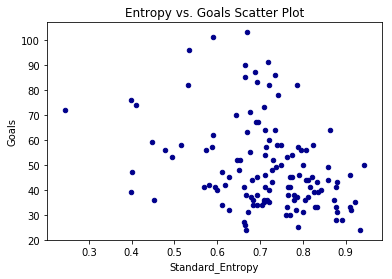

In [3]:
######################################
### RELATIONSHIP: GOALS VS ENTROPY ###
######################################

#SCATTER PLOT OF STANDARDISED ENTROPY VS GOALS
scatter = team1718.plot.scatter(x = 'Standard_Entropy', y = 'Goals', c = 'DarkBlue', title = 'Entropy vs. Goals Scatter Plot')
scatter

In [4]:
#RELATIONSHIP - ONGOING
X = team1718["Standard_Entropy"]
y = team1718["Goals"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Goals   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     16.40
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           8.91e-05
Time:                        10:12:11   Log-Likelihood:                -540.51
No. Observations:                 128   AIC:                             1085.
Df Residuals:                     126   BIC:                             1091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               83.6716      8.613      9.714      0.000      66.626     100.717
Standard_Entropy   -48.0664     11.870     -4.050      0.000     -71.556     -24.577
==============================================================================
Omnibus:                       19.293   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.751
Skew:                           0.985   Prob(JB):                     1.15e-05
Kurtosis:                       3.621   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

^ ONGOING: Analysis of the relationship between goals and standard entropy.

### League Analysis:

We found that there were a significant number of Scottish Premiership teams in the table for the teams with least variable goal scoring methods. This may be linked to the fact that there are only 12 teams in this league whereas there are 18+ in the others. To look deeper into this, we will calculate the entropy for each league below.

In [5]:
#########################
#### LEAGUE ANALYSIS ####
#########################

##################
## CALCULATIONS ##
##################

#CALCULATE GOAL TYPE RATIOS
league1718['OP_ratio'] = league1718.Open_Play / league1718.Goals
league1718['CRS_ratio'] = league1718.Cross / league1718.Goals
league1718['FK_ratio'] = league1718.Free_Kick / league1718.Goals
league1718['DFK_ratio'] = league1718.Direct_Free_Kick / league1718.Goals
league1718['THR_ratio'] = league1718.Throw_In / league1718.Goals
league1718['PEN_ratio'] = league1718.Penalty / league1718.Goals
league1718['COR_ratio'] = league1718.Corner / league1718.Goals
league1718['OTH_ratio'] = league1718.Other_Type / league1718.Goals

#CALCULATE X*LN(X) FOR ENTROPY FORMULA    
league1718['OP_ratio_log'] = league1718.apply(lambda row: entropy_log_calc(row['OP_ratio']), axis=1)
league1718['CRS_ratio_log'] = league1718.apply(lambda row: entropy_log_calc(row['CRS_ratio']), axis=1)
league1718['FK_ratio_log'] = league1718.apply(lambda row: entropy_log_calc(row['FK_ratio']), axis=1)
league1718['DFK_ratio_log'] = league1718.apply(lambda row: entropy_log_calc(row['DFK_ratio']), axis=1)
league1718['THR_ratio_log'] = league1718.apply(lambda row: entropy_log_calc(row['THR_ratio']), axis=1)
league1718['PEN_ratio_log'] = league1718.apply(lambda row: entropy_log_calc(row['PEN_ratio']), axis=1)
league1718['COR_ratio_log'] = league1718.apply(lambda row: entropy_log_calc(row['COR_ratio']), axis=1)
league1718['OTH_ratio_log'] = league1718.apply(lambda row: entropy_log_calc(row['OTH_ratio']), axis=1)

#CALCULATE ENTROPHY
league1718['Entropy'] = -(league1718.OP_ratio_log + league1718.CRS_ratio_log + league1718.FK_ratio_log + league1718.DFK_ratio_log
                        + league1718.OP_ratio_log + league1718.PEN_ratio_log + league1718.COR_ratio_log + league1718.OTH_ratio_log)

#CALCULATE STANDARDISED ENTROPHY
league1718['Standard_Entropy'] = league1718.Entropy / np.log(8)

#############
## OUTPUTS ##
#############

cols1 = ['Goals', 'OP_ratio', 'CRS_ratio', 'FK_ratio', 'DFK_ratio', 'THR_ratio', 'PEN_ratio', 'COR_ratio', 'OTH_ratio', 'Standard_Entropy']
display(league1718[cols1].sort_values(by=['Standard_Entropy'], ascending = False))

,Goals,OP_ratio,CRS_ratio,FK_ratio,DFK_ratio,THR_ratio,PEN_ratio,COR_ratio,OTH_ratio,Standard_Entropy
League,,,,,,,,,,
Serie A,981,0.575943,0.124363,0.051988,0.035678,0.000000,0.091743,0.119266,0.001019,0.792140
Bundesliga,835,0.590419,0.106587,0.069461,0.021557,0.000000,0.077844,0.130539,0.003593,0.775956
French Ligue 1,1000,0.596000,0.128000,0.045000,0.025000,0.000000,0.099000,0.106000,0.001000,0.762482
Eredivisie,928,0.616379,0.110991,0.046336,0.034483,0.000000,0.078664,0.112069,0.001078,0.746170
La Liga,996,0.618474,0.117470,0.050201,0.026104,0.000000,0.080321,0.107430,0.000000,0.737454
Premier League,989,0.602629,0.164813,0.042467,0.021234,0.002022,0.056623,0.110212,0.000000,0.735364
Scottish Premiership,582,0.761168,0.049828,0.032646,0.025773,0.000000,0.091065,0.034364,0.005155,0.544421


It can been that seen that the standardised entropy for the Scottish Premiership is significantly lower than all of the other leagues. This means that there is less variability in goal method in the Scottish Premiership. Comparing the goal method ratios between leagues; the significant differences can be seen in the greater open play and smaller cross and corner ratios in the Scottish Premiership. Could this be linked to tactics? Defensive strengths? 

### Player Analysis:

We will conduct further analysis into the goal variability at player level. To account for small samples sizes leading to inflated goal ratios, we will conduct our analysis on a subset of players; those with over 15 goals over the 2017/18 season. We will look at the variability of two different qualitative variables:
- Goal type (e.g. penalty)
- Goal method (e.g. left foot)

In [6]:
##########################
#### PLAYER ANALYSIS #####
##########################

##################
## CALCULATIONS ##
##################

#PLAYER DATA GOALS > 15 (42 players)
top_player1718 = player1718[player1718.Goals > 15].copy()

# CALCULATE GOAL TYPE RATIOS
top_player1718.loc[:,'OP_ratio'] = top_player1718.Open_Play / top_player1718.Goals
top_player1718.loc[:,'CRS_ratio'] = top_player1718.Cross / top_player1718.Goals
top_player1718.loc[:,'FK_ratio'] = top_player1718.Free_Kick / top_player1718.Goals
top_player1718.loc[:,'DFK_ratio'] = top_player1718.Direct_Free_Kick / top_player1718.Goals
top_player1718.loc[:,'THR_ratio'] = top_player1718.Throw_In / top_player1718.Goals
top_player1718.loc[:,'PEN_ratio'] = top_player1718.Penalty / top_player1718.Goals
top_player1718.loc[:,'COR_ratio'] = top_player1718.Corner / top_player1718.Goals
top_player1718.loc[:,'OTH_ratio'] = top_player1718.Other_Type / top_player1718.Goals

# CALCULATE GOAL METHOD RATIOS
top_player1718.loc[:,'right_ratio'] = top_player1718.Right_Foot / top_player1718.Goals
top_player1718.loc[:,'left_ratio'] = top_player1718.Left_Foot / top_player1718.Goals
top_player1718.loc[:,'head_ratio'] = top_player1718.Header / top_player1718.Goals
top_player1718.loc[:,'other_ratio'] = top_player1718.Other_Method / top_player1718.Goals

#LOG CALCULATIONS
top_player1718.loc[:,'OP_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['OP_ratio']), axis=1)
top_player1718.loc[:,'CRS_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['CRS_ratio']), axis=1)
top_player1718.loc[:,'FK_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['FK_ratio']), axis=1)
top_player1718.loc[:,'DFK_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['DFK_ratio']), axis=1)
top_player1718.loc[:,'THR_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['THR_ratio']), axis=1)
top_player1718.loc[:,'PEN_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['PEN_ratio']), axis=1)
top_player1718.loc[:,'COR_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['COR_ratio']), axis=1)
top_player1718.loc[:,'OTH_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['OTH_ratio']), axis=1)

top_player1718.loc[:,'right_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['right_ratio']), axis=1)
top_player1718.loc[:,'left_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['left_ratio']), axis=1)
top_player1718.loc[:,'head_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['head_ratio']), axis=1)
top_player1718.loc[:,'other_ratio_log'] = top_player1718.apply(lambda row: entropy_log_calc(row['other_ratio']), axis=1)

#CALCULATE ENTROPY
top_player1718.loc[:,'Type_Entropy'] = -(top_player1718.OP_ratio_log + top_player1718.CRS_ratio_log + top_player1718.FK_ratio_log 
                                + top_player1718.DFK_ratio_log + top_player1718.OP_ratio_log + top_player1718.PEN_ratio_log
                                + top_player1718.COR_ratio_log + top_player1718.OTH_ratio_log)

top_player1718.loc[:,'Method_Entropy'] = -(top_player1718.right_ratio_log + top_player1718.left_ratio_log
                                    + top_player1718.head_ratio_log + top_player1718.other_ratio_log)

#STANDARDISED ENTROPY
top_player1718.loc[:,'Standard_Type_Entropy'] = top_player1718['Type_Entropy'] / np.log(8)
top_player1718.loc[:,'Standard_Method_Entropy'] = top_player1718['Method_Entropy'] / np.log(4)

#############
## OUTPUTS ##
#############

## GOAL TYPES ##
cols2 = ['League', 'Player', 'Goals', 'Open_Play', 'Cross', 'Free_Kick', 'Direct_Free_Kick', 'Throw_In', 'Penalty', 'Corner', 'Other_Type', 'Standard_Type_Entropy']
type_results = top_player1718[cols2].sort_values(by = ['Standard_Type_Entropy'], ascending = False).reset_index(drop=True)
type_results.index = type_results.index + 1

#FIVE MOST VARIABLE GOALSCORERS
display(type_results.head(5))
        
#FIVE LEAST VARIABLE GOALSCORERS
display(type_results.tail(5))
        
## GOAL METHODS ##
cols3 = ['League', 'Player', 'Goals', 'Right_Foot', 'Left_Foot', 'Header', 'Other_Method', 'Standard_Method_Entropy']
method_results = top_player1718[cols3].sort_values(by = ['Standard_Method_Entropy'], ascending = False).reset_index(drop=True)
method_results.index = method_results.index + 1

#FIVE 5 MOST VARIABLE GOALSCORERS
display(method_results.head())
        
#FIVE 5 LEAST VARIABLE GOALSCORERS
display(method_results.tail())

,League,Player,Goals,Open_Play,Cross,Free_Kick,Direct_Free_Kick,Throw_In,Penalty,Corner,Other_Type,Standard_Type_Entropy
1,La Liga,Cristhian Stuani,21,6,4,4,0,0,5,2,0,0.920054
2,French Ligue 1,Radamel Falcao,18,8,1,3,0,0,3,3,0,0.854692
3,French Ligue 1,Mario Balotelli,18,7,2,0,1,0,6,2,0,0.841396
4,Eredivisie,Fran Sol,16,8,3,2,0,0,2,1,0,0.817607
5,French Ligue 1,Karl Toko Ekambi,17,9,2,2,0,0,3,1,0,0.793343


,League,Player,Goals,Open_Play,Cross,Free_Kick,Direct_Free_Kick,Throw_In,Penalty,Corner,Other_Type,Standard_Type_Entropy
38,Scottish Premiership,Kris Boyd,18,14,0,0,2,0,2,0,0,0.422809
39,La Liga,Gareth Bale,16,13,0,0,0,0,1,2,0,0.370595
40,French Ligue 1,Alassane Plea,16,14,0,0,0,0,1,1,0,0.279043
41,Premier League,Mohamed Salah,32,28,3,0,0,0,1,0,0,0.271180
42,Eredivisie,Hirving Lozano,17,15,2,0,0,0,0,0,0,0.227296


,League,Player,Goals,Right_Foot,Left_Foot,Header,Other_Method,Standard_Method_Entropy
1,Premier League,Harry Kane,30,13,10,6,1,0.839532
2,Serie A,Edin Dzeko,16,3,8,5,0,0.738609
3,La Liga,Iago Aspas,22,6,13,1,2,0.738455
4,La Liga,Cristiano Ronaldo,26,14,7,5,0,0.723987
5,French Ligue 1,Radamel Falcao,18,10,3,5,0,0.707634


,League,Player,Goals,Right_Foot,Left_Foot,Header,Other_Method,Standard_Method_Entropy
38,La Liga,Gareth Bale,16,2,13,1,0,0.434196
39,French Ligue 1,Alassane Plea,16,13,2,1,0,0.434196
40,Serie A,Paulo Dybala,22,4,18,0,0,0.342019
41,French Ligue 1,Nabil Fekir,18,2,16,0,0,0.251629
42,La Liga,Lionel Messi,34,2,32,0,0,0.161378


Comments:

- - Players featuring in the top 5 most variable goal type tend to be players who take penalties and are good in the air (e.g. Stuani and Falcao).
- Harry Kane has by far the most variability in his finishing. This demonstrates his high class finishing in all areas.
- The bottom 5 players in order of goal method variability are mostly left footed (4/5).
- Interestingly Messi is in the bottom 5 in most variable goal types whereas Ronaldo is in the top 5 most variable. Demonstrates the range of goals scored by Ronaldo and Messi's dominance of left footed goals.

It would be interesting to test the common assumption that Robben always cuts inside and see where his entropy ranks. Unfortunately, he only scored 5 goals in the 2017/18 season and this sample size is too small.

To improve our results at the player level, the sample size should be increased over multiple seasons to increase the total number of goals and make the entropy more representative.